## DL_Assignment_1
1. What is the function of a summation junction of a neuron? What is threshold activation function?
2. What is a step function? What is the difference of step function with threshold function?
3. Explain the McCulloch–Pitts model of neuron.
4. Explain the ADALINE network model.
5. What is the constraint of a simple perceptron? Why it may fail with a real-world data set?
6. What is linearly inseparable problem? What is the role of the hidden layer?
7. Explain XOR problem in case of a simple perceptron.
8. Design a multi-layer perceptron to implement A XOR B.
9. Explain the single-layer feed forward architecture of ANN.
10. Explain the competitive network architecture of ANN.
11. Consider a multi-layer feed forward neural network. Enumerate and explain steps in the backpropagation algorithm used to train the network.
12. What are the advantages and disadvantages of neural networks?
13. Write short notes on any two of the following:
    1. Biological neuron
    2. ReLU function
    3. Single-layer feed forward ANN
    4. Gradient descent
    5. Recurrent networks

### Ans 1

The summation junction in a neuron is where input signals are weighted and summed. Each input is multiplied by a weight, and the results are added together. This operation determines the strength of the input signal reaching the neuron. The threshold activation function, commonly known as the step function, is applied after summation. It acts as a switch. If the weighted sum of inputs surpasses a predetermined threshold, the neuron fires, producing an output of 1; otherwise, it remains inactive, outputting 0. The threshold can be adjusted during training. While simple, this activation function was historically used in single-layer perceptrons for binary classification. However, modern deep learning typically employs more complex activation functions, such as sigmoid, tanh, or ReLU, which offer continuous and flexible transformations, enabling the modeling of intricate data relationships. These advanced activations are crucial for deep networks, allowing them to excel in various complex tasks.

In this code:

1. threshold_neuron takes a list of inputs, a list of weights, and a threshold as arguments.
2. It calculates the weighted sum of inputs by multiplying each input by its corresponding weight and summing them up.
3. Then, it applies the threshold activation function. If the weighted sum is greater than or equal to the specified threshold, it returns 1; otherwise, it returns 0.

In [1]:
# Define a simple neuron function with threshold activation
def threshold_neuron(inputs, weights, threshold):
    # Ensure the number of inputs matches the number of weights
    if len(inputs) != len(weights):
        raise ValueError("Number of inputs must match the number of weights.")
    
    # Calculate the weighted sum
    weighted_sum = sum(x * w for x, w in zip(inputs, weights))
    
    # Apply the threshold activation function
    if weighted_sum >= threshold:
        return 1
    else:
        return 0

# Example usage
inputs = [0.5, 0.3, 0.2]
weights = [0.4, -0.2, 0.7]
threshold = 0.3

output = threshold_neuron(inputs, weights, threshold)
print("Output:", output)

Output: 0


### Ans 2

A **step function** and a **threshold function** are closely related but have subtle differences. Both are simple mathematical functions used in the context of artificial neural networks.

**Step Function:**
- A step function, also known as the Heaviside step function, is a mathematical function that maps any input to one of two discrete values, typically 0 or 1.
- It produces an output of 0 if the input is less than zero and an output of 1 if the input is equal to or greater than zero.
- It is often used as a basic building block in mathematical and engineering contexts to create binary decisions or to model simple on/off behavior.

**Threshold Function:**
- A threshold function is a broader concept that represents a function used to determine whether a neuron in an artificial neural network should activate (produce an output) based on a weighted sum of inputs compared to a predefined threshold.
- While the threshold function conceptually resembles a step function, it allows for more flexibility because it can have different threshold values for different neurons or layers in a neural network.
- In practical terms, a threshold function in a neural network often uses a continuous activation function, such as the sigmoid or ReLU, to model more complex behaviors than a strict 0/1 output.

In summary, the main difference lies in their applications: a step function is a specific type of threshold function that yields a binary output (0 or 1), whereas a threshold function in neural networks can involve various activation functions and threshold values to enable more nuanced information processing.

Here's a example that demonstrates both a step function and a threshold function:-

In this code:

1. The step_function takes an array of input values and returns an array where each element is 1 if the input is greater than or equal to 0 and 0 otherwise.

2. The threshold_function takes input values and a specified threshold, and it returns an array where each element is 1 if the input is greater than or equal to the threshold and 0 otherwise.

In [2]:
import numpy as np

# Step function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Threshold function
def threshold_function(x, threshold):
    return np.where(x >= threshold, 1, 0)

# Example usage
input_values = np.array([-1, 0, 1, 2, 3])
threshold = 1.0

# Applying the step function
step_result = step_function(input_values)

# Applying the threshold function
threshold_result = threshold_function(input_values, threshold)

print("Input Values:", input_values)
print("Step Function Result:", step_result)
print(f"Threshold Function Result (Threshold={threshold}):", threshold_result)

Input Values: [-1  0  1  2  3]
Step Function Result: [0 1 1 1 1]
Threshold Function Result (Threshold=1.0): [0 0 1 1 1]


### Ans 3

The McCulloch-Pitts model, developed by Warren McCulloch and Walter Pitts in 1943, is one of the earliest and most foundational models of an artificial neuron or a simple computational unit. It laid the groundwork for modern artificial neural networks. Here's an explanation of the McCulloch-Pitts (M-P) model:

**Components:**
1. **Inputs:** The M-P model takes binary inputs, which are either on (1) or off (0). These inputs represent signals or information from other neurons or external sources.

2. **Weights:** Each input is associated with a weight, which represents the strength or importance of that input. These weights can be positive or negative.

3. **Summation:** The model computes a weighted sum of the inputs. It multiplies each input by its corresponding weight and then adds up these weighted inputs.

4. **Threshold:** A threshold is defined as a threshold value or a threshold function. If the weighted sum of inputs reaches or exceeds this threshold, the neuron "fires" or produces an output of 1; otherwise, it remains inactive and outputs 0.

**Functioning:**
- Mathematically, the operation of the M-P model can be described as follows:
  ```
  Output = { 1 if Σ(w_i * x_i) ≥ Threshold, 0 otherwise }
  ```
  where:
  - `w_i` represents the weight associated with input `x_i`.
  - `Σ` represents summation over all inputs.
  - `Threshold` is a predetermined threshold value.

**Key Characteristics:**
- The McCulloch-Pitts model is a binary model; it produces binary outputs (1 or 0).
- It represents a simplified abstraction of a biological neuron's functioning, focusing on the concept of threshold activation.
- It is capable of performing basic logical operations such as AND, OR, and NOT when appropriately configured with weights and thresholds.

While the McCulloch-Pitts model was an important starting point in the history of artificial neural networks, modern neural networks use more complex activation functions, continuous-valued inputs, and a broader range of neuron types to model the complexities of real-world data and tasks.

### Ans 4

The ADALINE (Adaptive Linear Neuron) network model is a type of artificial neural network introduced by Bernard Widrow and Ted Hoff in 1960. It is a single-layer neural network designed for linear pattern classification and regression tasks. 

Key features of ADALINE:

1. **Linear Summation:** ADALINE computes a weighted sum of its input features, similar to the perceptron or McCulloch-Pitts model.

2. **Adaptive Weights:** Unlike the perceptron, ADALINE uses adaptive weights. It adjusts these weights iteratively using a learning algorithm (typically the Widrow-Hoff or LMS algorithm) to minimize the error between the network's output and the desired target values.

3. **Continuous Output:** ADALINE provides continuous output, making it suitable for regression tasks. The output is not binary; it represents a real-valued prediction.

4. **Applications:** ADALINE has been used in various applications, including noise cancellation, signal processing, and linear pattern recognition problems.

Overall, ADALINE's adaptive weight updating mechanism makes it a precursor to more advanced neural networks and adaptive algorithms used in modern machine learning. It demonstrates the concept of training a network to adjust its weights to achieve better accuracy in predicting continuous-valued outputs.

### Ans 5

A simple perceptron, also known as a single-layer perceptron, has several limitations that can cause it to fail with real-world datasets:

1. **Linear Separability Requirement:** The primary constraint of a simple perceptron is that it can only learn and make decisions for datasets that are linearly separable. In other words, it can only find a single hyperplane that perfectly separates data points of different classes. Real-world data often contains complex, non-linear relationships that a single hyperplane cannot capture.

2. **Inability to Handle XOR-Like Problems:** Simple perceptrons cannot solve problems like the XOR function, which requires a non-linear decision boundary. This limitation arises from their linear activation function, making them unsuitable for tasks that demand complex feature mappings.

3. **Sensitivity to Input Scaling:** Perceptrons are sensitive to the scaling of input features. Changes in the scale of features can lead to different weight values and, in some cases, affect the network's ability to converge or generalize effectively.

4. **No Mechanism for Handling Multiclass Classification:** Perceptrons are inherently binary classifiers and cannot directly handle problems with more than two classes without modifications.

To address these constraints, multi-layer perceptrons (MLPs) with non-linear activation functions and deeper architectures have been developed, allowing them to model more complex relationships in real-world data.

### Ans 6

A linearly inseparable problem refers to a type of data classification or pattern recognition task in which the boundary that separates different classes or categories of data points cannot be defined by a single straight line (or hyperplane in higher dimensions). In other words, linearly inseparable data cannot be effectively separated or classified using a linear model, such as a simple perceptron or a linear regression model.

The role of a hidden layer in a neural network, particularly in a multi-layer perceptron (MLP), is to introduce non-linearity into the model. Hidden layers transform the input data using non-linear activation functions, allowing the network to capture complex, non-linear relationships in the data. This enables the neural network to solve problems that involve patterns that are not linearly separable.

In summary, the hidden layer's primary role is to provide the neural network with the capacity to learn and represent non-linear mappings between inputs and outputs, making it capable of addressing complex real-world problems that linear models cannot handle effectively.

### Ans 7

The XOR problem is a classic example that illustrates the limitations of a simple perceptron. XOR (exclusive OR) is a binary logical operation with two inputs and one output. It returns 1 if the number of 1s in the input is odd and 0 if it's even. The XOR problem involves classifying data points into two classes, but it cannot be solved by a single-layer perceptron.

The issue arises because XOR data points are not linearly separable. No single straight line (or hyperplane) can separate the data points of one class (e.g., 0s) from the other class (e.g., 1s). A perceptron uses a linear activation function and can only create linear decision boundaries, making it incapable of capturing the XOR pattern.

To solve the XOR problem, a multi-layer perceptron (MLP) with at least one hidden layer and non-linear activation functions (e.g., sigmoid or ReLU) is required. The hidden layer introduces the necessary non-linearity to model the XOR function effectively.

### Ans 8

To implement the XOR function using a multi-layer perceptron (MLP), you need a network architecture with an input layer, one or more hidden layers, and an output layer. Here's a simple design for an MLP to perform A XOR B:

**Architecture:**
1. **Input Layer:** Two input neurons for A and B.

2. **Hidden Layer:** One hidden layer with two neurons. This layer introduces non-linearity.

3. **Output Layer:** One output neuron to produce the XOR result.

**Activation Function:** You can use the sigmoid activation function for both the hidden and output layers.

**Weights and Biases:** Initialize the weights and biases randomly and update them during training.

**Training:** Use a training algorithm like backpropagation with gradient descent to adjust the weights and biases based on the error between the network's predictions and the actual XOR results.

**Loss Function:** Typically, you can use mean squared error (MSE) as the loss function.

This architecture should enable the MLP to learn and correctly predict the XOR function (A XOR B) after sufficient training epochs.

This code defines an MLP with one hidden layer to solve the XOR problem using PyTorch. After training, the model should correctly predict the XOR function for different input combinations.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the MLP architecture
class XOR_MLP(nn.Module):
    def __init__(self):
        super(XOR_MLP, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer to hidden layer
        self.fc2 = nn.Linear(2, 1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create the model and define loss and optimizer
model = XOR_MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item()}')

# Test the trained model
with torch.no_grad():
    test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_inputs)
    print("\nPredictions:")
    for i in range(len(test_inputs)):
        print(f"{test_inputs[i].tolist()} => {predictions[i].item():.4f}")

Epoch [1000/10000], Loss: 0.24995963275432587
Epoch [2000/10000], Loss: 0.24994167685508728
Epoch [3000/10000], Loss: 0.24991698563098907
Epoch [4000/10000], Loss: 0.24988043308258057
Epoch [5000/10000], Loss: 0.24982167780399323
Epoch [6000/10000], Loss: 0.24971692264080048
Epoch [7000/10000], Loss: 0.24950161576271057
Epoch [8000/10000], Loss: 0.24896636605262756
Epoch [9000/10000], Loss: 0.24731841683387756
Epoch [10000/10000], Loss: 0.2417753040790558

Predictions:
[0.0, 0.0] => 0.4464
[0.0, 1.0] => 0.5004
[1.0, 0.0] => 0.5178
[1.0, 1.0] => 0.5345


### Ans 9

The single-layer feedforward architecture, often referred to as a single-layer perceptron or a single-layer artificial neural network (ANN), is one of the simplest forms of neural networks. It consists of three main components:

1. **Input Layer:** The input layer receives the features or data attributes. Each input neuron represents one feature, and the number of input neurons is equal to the number of features in the dataset.

2. **Weights:** Each input neuron is associated with a weight, which represents the strength or importance of that feature in the network's decision-making process. These weights are learned during training to adjust their values.

3. **Output Layer:** The output layer consists of one or more neurons, depending on the specific problem. The output layer performs a weighted sum of the inputs (weighted by the learned weights) and applies an activation function. The activation function determines the output value(s) of the network. Common activation functions for single-layer networks include step functions for binary classification and linear functions for regression tasks.

The single-layer feedforward architecture is primarily used for linearly separable problems, such as simple binary classification tasks. However, its limitations become evident when dealing with complex, non-linear problems, which require more sophisticated architectures, like multi-layer perceptrons (MLPs).

### Ans 10

The competitive network architecture, also known as a competitive learning network or Kohonen Self-Organizing Map (SOM), is a type of artificial neural network (ANN) designed for unsupervised learning and data clustering. It consists of a layer of neurons, typically arranged in a grid-like fashion. Here's how it works:

1. **Neuron Competition:** Each neuron in the competitive network competes to be the "winner" for a given input. The neuron with the closest weight vector to the input vector is declared the winner.

2. **Weight Update:** When a neuron wins, its weight vector is adjusted to become even closer to the input vector. This process encourages neurons to specialize in recognizing specific patterns or clusters in the data.

3. **Neighborhood Function:** A neighborhood function defines how much the weights of neighboring neurons should be adjusted. Initially, the neighborhood is relatively broad, but it shrinks over time as the network learns.

The competitive network is particularly useful for tasks like clustering, visualization, and dimensionality reduction, where it can uncover underlying data structures and patterns. It's often used in exploratory data analysis and feature mapping.

In this updated code:

1. We initialize the weights within the range of the input data to encourage initial separation.
2. The learning rate is updated using an exponential decay schedule to reduce it gradually as training progresses.
3. The updated learning rate and weight initialization should help distribute the SOM neurons better across the input data space.

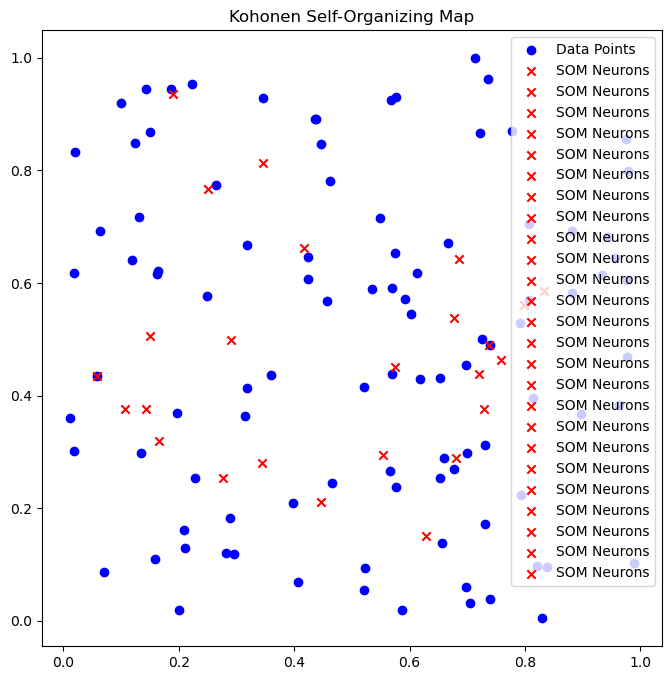

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points
np.random.seed(0)
data = np.random.rand(100, 2)

# Initialize SOM parameters
grid_size = (5, 5)  # Size of the SOM grid
input_dim = data.shape[1]  # Input dimension
initial_learning_rate = 0.1  # Initial learning rate
epochs = 500  # Number of training epochs

# Initialize SOM weights randomly within the data range
weights = np.random.rand(grid_size[0], grid_size[1], input_dim) * (data.max() - data.min()) + data.min()

# Training loop
for epoch in range(epochs):
    current_learning_rate = initial_learning_rate * np.exp(-epoch / (epochs / np.log(initial_learning_rate)))
    for input_vector in data:
        # Find the winning neuron (closest weight vector)
        differences = weights - input_vector
        distances = np.linalg.norm(differences, axis=2)
        winner = np.unravel_index(np.argmin(distances), distances.shape)

        # Update the winning neuron's weights and its neighbors
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                delta = input_vector - weights[i, j]
                influence = np.exp(-((i - winner[0])**2 + (j - winner[1])**2) / (2))
                weights[i, j] += current_learning_rate * influence * delta

# Visualization of the SOM
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c='b', label='Data Points')
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        plt.scatter(weights[i, j, 0], weights[i, j, 1], c='r', marker='x', label='SOM Neurons')
plt.legend()
plt.title('Kohonen Self-Organizing Map')
plt.show()

### Ans 11

The backpropagation algorithm is a crucial method for training multi-layer feedforward neural networks. It is used to update the network's weights and biases to minimize the error between predicted and actual output values. Here are the steps involved in the backpropagation algorithm:

1. **Forward Pass:**
   - Input data is fed forward through the network, layer by layer. Each neuron computes a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.
   - The activations at each layer are stored for later use in the backpropagation process.

2. **Compute Error:**
   - Calculate the error between the predicted output and the actual target values using a chosen loss function. Common loss functions include mean squared error (MSE) for regression and cross-entropy for classification.

3. **Backward Pass (Backpropagation):**
   - Starting from the output layer, calculate the gradient of the loss with respect to the activations and weights of that layer.
   - Use the chain rule to propagate these gradients backward through the layers, computing gradients and deltas for each layer.

4. **Weight and Bias Updates:**
   - Update the weights and biases of each neuron using the calculated gradients. This update typically involves gradient descent or one of its variants like stochastic gradient descent (SGD), Adam, or RMSProp.
   - Learning rate plays a critical role in controlling the step size of these updates.

5. **Repeat:** 
   - Steps 1 to 4 are repeated for multiple iterations or epochs, allowing the network to adjust its parameters iteratively.

6. **Convergence:** 
   - Training continues until the loss converges to a satisfactory level or a predefined number of epochs is reached.

7. **Validation and Testing:** 
   - After training, the network's performance is assessed on validation and test datasets to ensure it generalizes well to unseen data.

Backpropagation is essential for training deep neural networks, allowing them to learn complex mappings and solve a wide range of tasks, from image recognition to natural language processing. It involves optimizing the weights and biases to minimize prediction errors during training.

### Ans 12

**Advantages of Neural Networks:**

1. **Versatility:** Neural networks can be applied to a wide range of tasks, including image recognition, natural language processing, speech recognition, and more.

2. **Feature Learning:** They can automatically learn relevant features from raw data, reducing the need for manual feature engineering.

3. **Non-Linearity:** Neural networks can model complex, non-linear relationships in data, making them effective for solving intricate problems.

4. **Scalability:** Deep neural networks can handle large datasets and complex problems by adding more layers and neurons.

5. **Parallel Processing:** Neural networks can be parallelized on GPUs, enabling faster training and inference.

**Disadvantages of Neural Networks:**

1. **Data Intensive:** They often require large amounts of labeled data for effective training, which may not always be available.

2. **Complexity:** Deep networks can be difficult to design and tune, and they may suffer from overfitting if not properly regularized.

3. **Computationally Intensive:** Training deep networks can be computationally expensive and time-consuming.

4. **Lack of Transparency:** The internal workings of deep networks can be challenging to interpret and explain, leading to concerns about their black-box nature.

5. **Prone to Local Minima:** The optimization problem during training can sometimes get stuck in local minima, affecting convergence.

6. **Hardware Requirements:** Deep networks often require powerful hardware, like GPUs, for efficient training, which can be costly.

Neural networks are powerful tools but require careful consideration and sufficient resources to be effectively used in practice.

### Ans 13

A. **Biological Neuron:**
   - A biological neuron is the fundamental unit of the human nervous system.
   - It consists of dendrites (input receivers), a cell body, an axon (output transmitter), and synapses (connections to other neurons).
   - Biological neurons transmit electrical signals (action potentials) and communicate via chemical synapses.
   - The functioning of biological neurons inspired the development of artificial neural networks (ANNs).

B. **ReLU Function (Rectified Linear Unit):**
   - ReLU is a popular activation function in ANNs.
   - It's defined as f(x) = max(0, x), meaning it returns the input if it's positive, or zero otherwise.
   - ReLU introduces non-linearity into the network, enabling it to model complex relationships.
   - It helps mitigate the vanishing gradient problem and accelerates training.
   - Despite its simplicity, ReLU has been highly effective in deep learning models.

C. **Single-layer Feedforward ANN:**
   - A single-layer feedforward ANN, or single-layer perceptron, consists of an input layer and an output layer.
   - It's a simple linear classifier used for tasks like binary classification.
   - It cannot handle complex, non-linear problems and is limited to linearly separable data.
   - The output is computed as a weighted sum of inputs, followed by an activation function like the step function.

D. **Gradient Descent:**
   - Gradient descent is an optimization algorithm used to minimize the loss or error of a machine learning model.
   - It iteratively updates model parameters in the direction of the steepest decrease in the loss.
   - Learning rates control the step size of each parameter update.
   - Variants like stochastic gradient descent (SGD) and Adam improve convergence and efficiency.
   - Gradient descent is crucial for training deep neural networks.

E. **Recurrent Networks:**
   - Recurrent neural networks (RNNs) are a class of neural networks designed for sequence data.
   - They have loops or connections between neurons, allowing them to maintain a hidden state and process sequences of varying lengths.
   - RNNs are used in tasks like natural language processing, speech recognition, and time-series prediction.
   - Challenges with vanishing gradients have led to the development of more advanced RNN variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit).
   - RNNs excel in capturing temporal dependencies but may struggle with long-term dependencies due to vanishing gradients.